In [2]:
from glob import glob
from waveform_tools import ScopeWaveform
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [3]:
infpns = glob('20220321_data_58V/*.csv')

def trigger_intervals_one_file(infpn):
    wf = ScopeWaveform(infpn)
    print(wf.waveform_peaks(9e-3))
    print(wf.df.head())
    wf.draw_waveform()

[(-3.85918e-05, 0.01680000068137355), (-9.6546e-06, 0.01560000058137355), (2.3e-08, 0.01440000058137355), (2.55286e-05, 0.01560000058137355), (5.1876e-05, 0.009600000381373548), (5.69632e-05, 0.009600000381373548)]
         info_name         value    units     time  waveform_value  \
0    Record Length  5.000000e+05   Points -0.00004         -0.0012   
1  Sample Interval  2.000000e-10        s -0.00004          0.0012   
2    Trigger Point  1.999000e+05  Samples -0.00004         -0.0012   
3     Trigger Time  1.405610e-10        s -0.00004         -0.0012   
4              NaN           NaN      NaN -0.00004          0.0036   

   partial_integral  is_peak  
0     -1.200000e-03    False  
1      2.747097e-12    False  
2     -1.200000e-03    False  
3     -2.400000e-03    False  
4      1.200000e-03    False  


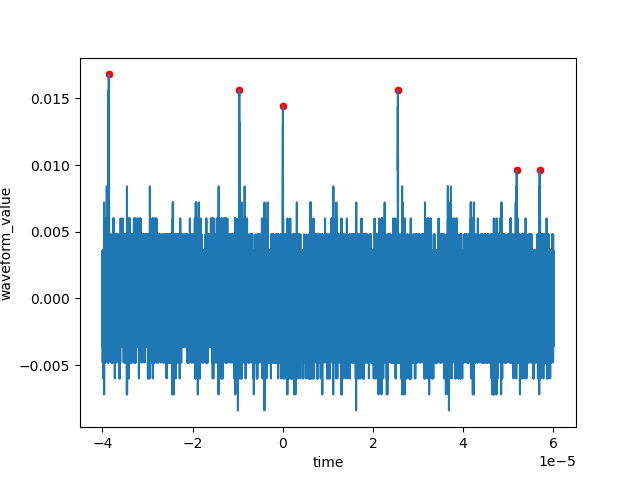

In [4]:
trigger_intervals_one_file(infpns[1])

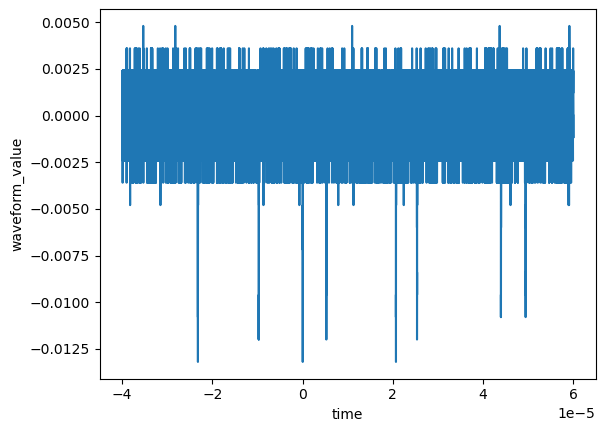

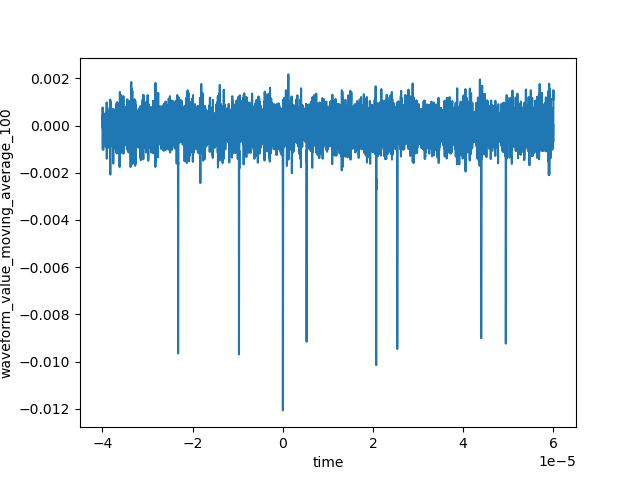

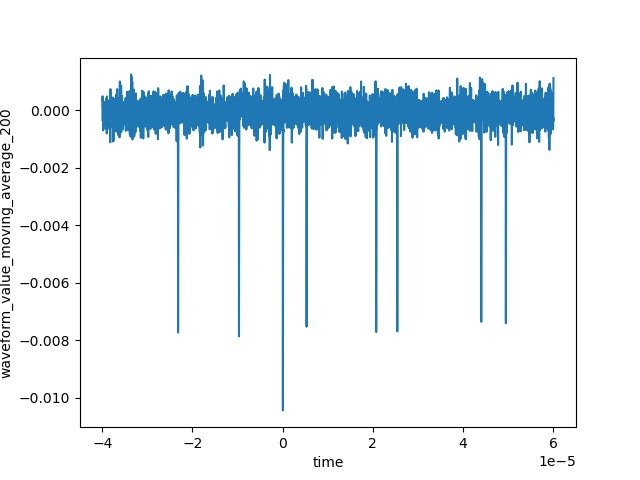

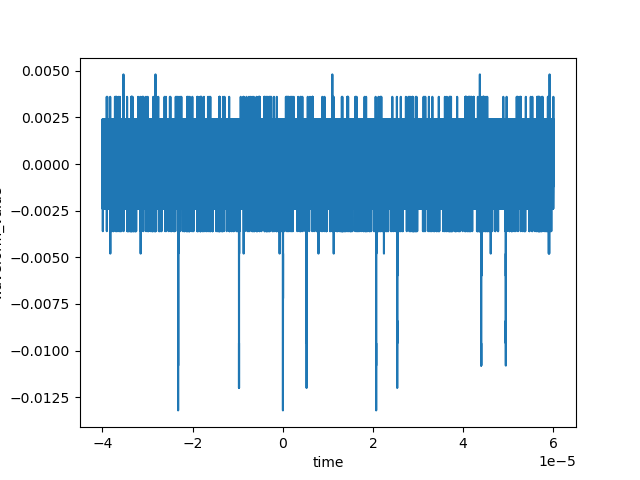

In [9]:
wf = ScopeWaveform('20220408_rate_waveform_57.2V_amp_diff_box_25C/sample1.csv')
wf.add_moving_averate(100)
wf.draw_waveform(100)
wf.add_moving_averate(200)
wf.draw_waveform(200)
wf.draw_waveform()

In [10]:
def likeliood_func(b):
    return lambda a: math.pow(a, len(b))*math.exp(-a*sum(b))
wf.waveform_peaks(0.007, polarity=-1)
interarrivals = wf.waveform_peak_time_diffs(0.007, polarity=-1)
le = likeliood_func(interarrivals)
r_min = sum(interarrivals)/len(interarrivals)
le(r_min)
# t = np.linspace(0, 2*r_min, 100)
# plt.plot(t, le(t), color='red')

4.637704344507781e-41